In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# 2. Linear regression

## Simple linear regression (GHV Chapters 6-9)

***Start of Lecture 4, 2025.01.20 (recorded 2025.01.18)***

### Today

- Sample from a simple linear regression model

- Fit a simple linear regression model

- Investigate distributions of parameter estimates

- Primary reference: GHV Chapter 6

### The model

$$
y_i = a + b x_i + \epsilon_i,\qquad \epsilon_i\sim N(0, \sigma^2)\qquad \text{(indep.)}
$$

#### Generate fake parameters and fake data



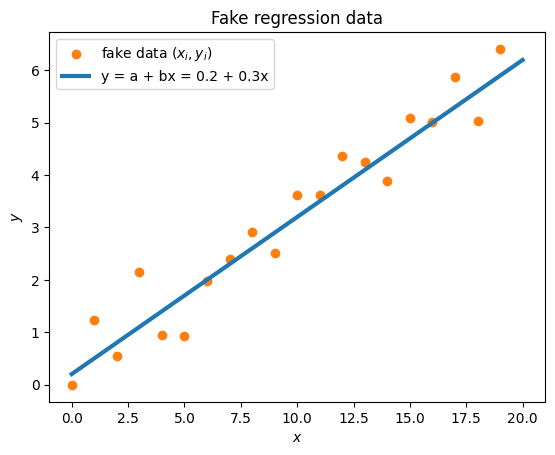

In [ ]:
a = 0.2
b = 0.3
sigma = 0.5
n = 20
x = np.arange(n)
y = a + b * x + stats.norm(0, sigma).rvs(size=n)
plt.scatter(x, y, color="C1", label="fake data $(x_i, y_i)$")
plt.plot([0, 20], [a, a + b * 20], lw=3, label=f"y = a + bx = {a} + {b}x")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title("Fake regression data")
plt.show()

#### Fit a `LinearRegression` model to the fake data

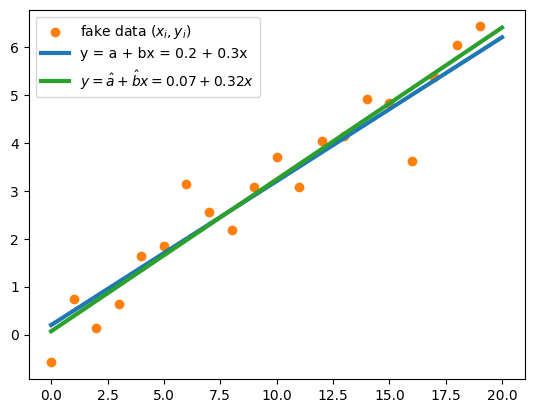

In [ ]:
model = LinearRegression()
X = x.reshape(-1, 1)
model.fit(X, y)
ahat = model.intercept_
bhat = model.coef_[0]
plt.scatter(x, y, color="C1", label="fake data $(x_i, y_i)$")
plt.plot([0, 20], [a, a + b * 20], color="C0", lw=3, label=f"y = a + bx = {a} + {b}x")
plt.plot(
    [0, 20],
    [ahat, ahat + bhat * 20],
    color="C2",
    lw=3,
    label=f"$y = \\hat{{a}} + \\hat{{b}}x = {ahat:.2f} + {bhat:.2f}x$",
)
plt.legend()
plt.show()

#### Uncertainty in regression coefficients

- The coefficients estimates $\hat{a}$ and $\hat{b}$ are random variables.

- We can generate their distributions by replicating our simulation.

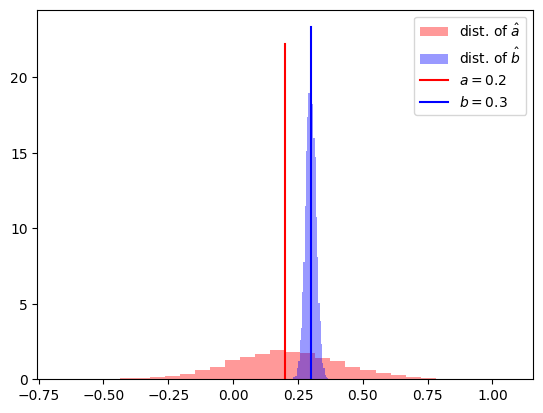

In [50]:
r = 10_000
epsilons = stats.norm(0, sigma).rvs(size=(n, r))
ys = a + b * X + epsilons
model = LinearRegression()
model.fit(X, ys)
ahats = model.intercept_
bhats = model.coef_[:, 0]
plt.hist(
    ahats, bins=30, color=(1, 0, 0, 0.4), density=True, label="dist. of $\\hat{a}$"
)
plt.hist(
    bhats, bins=30, color=(0, 0, 1, 0.4), density=True, label="dist. of $\\hat{b}$"
)
plt.plot([a, a], plt.ylim(), color=(1, 0, 0, 1), label=f"$a = {a}$")
plt.plot([b, b], plt.ylim(), color=(0, 0, 1, 1), label=f"$b = {b}$")
plt.legend()
plt.show()

- The distributions of $\hat{a}$ and $\hat{b}$ look normal because they are.

#### Residuals and estimating $\sigma$

Predicted $y$-values:
$$
\hat{y}_i = \hat{a} + \hat{b}x_i
$$

Residuals:
$$
\hat{y}_i - y_i
$$

Residual sum of squares:
$$
\operatorname{RSS} = \sum_{i < n}(\hat{y}_i - y_i)^2
$$

Estimate $\sigma^2$:
$$
s^2 = \frac{\operatorname{RSS}}{n - 2}
$$

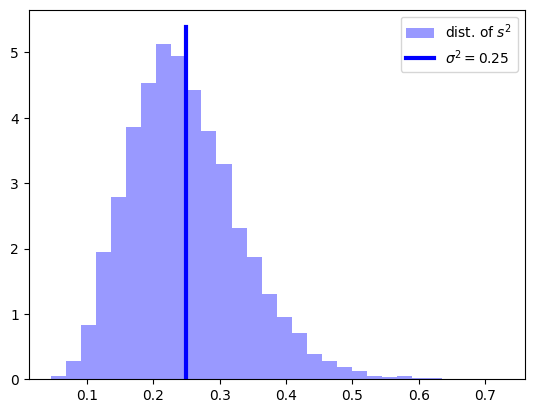

In [67]:
yhats = model.predict(X)
rsss = np.sum((yhats - ys) ** 2, axis=0)
s2s = rsss / (n - 2)
plt.hist(s2s, bins=30, density=True, color=(0, 0, 1, 0.4), label="dist. of $s^2$")
plt.plot(
    [sigma**2, sigma**2],
    plt.ylim(),
    color=(0, 0, 1),
    lw=3,
    label=f"$\\sigma^2={sigma**2}$",
)
plt.legend()
plt.show()

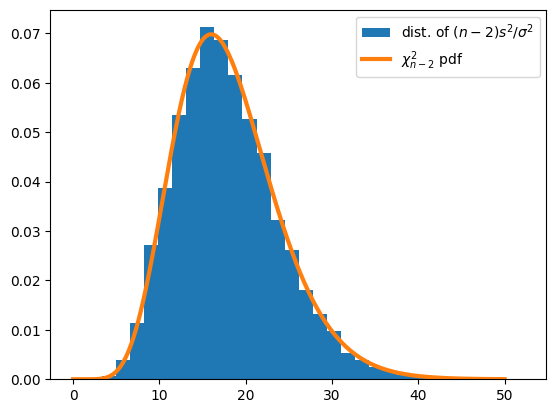

In [ ]:
plt.hist(
    (n - 2) * s2s / sigma**2,
    bins=30,
    density=True,
    label="dist. of $(n-2)s^2/\\sigma^2$",
)
mesh = np.linspace(0, 50, 1000)
plt.plot(mesh, stats.chi2(n - 2).pdf(mesh), lw=3, label="$\\chi^2_{n-2}$ pdf")
plt.legend()
plt.show()

- The `LinearRegression` class doesn't compute standard errors for coefficient estimates because `scikit-learn` doesn't concern itself with statistical inference.

***End of Lecture 4, 2025.01.20 (recorded 2025.01.18)***